#_**GLASS VS NO-GLASS** CLASSIFICATION_

###_IMPORTING **DEPENDENCIES**_

In [1]:
import pandas  as pd #Data Manipulation
import numpy as np #Data Manipulation
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###_LOADING **DATASET**_

In [3]:
file_path = "/content/gdrive/MyDrive/train.csv" #File Path
df = pd.read_csv(file_path)

In [4]:
#Head Rows 
df.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
0,1,0.37797,-0.94808,0.01346,0.17893,0.37795,0.63571,0.13943,-0.25607,-0.39341,1.08947,-1.36048,-1.31529,0.36119,-0.62857,-1.65290,1.47167,-0.88741,-0.25942,-0.34414,-0.38914,0.38425,-0.50553,-0.09451,0.30568,-1.07570,-0.65924,1.10918,1.22234,-0.12479,0.50198,-0.63932,0.61505,1.16747,0.36921,-0.44398,0.46192,-0.83207,-0.74952,-0.40722,...,0.54072,-0.71995,1.11262,-0.11429,0.85618,0.17233,-1.06815,0.04569,-0.13031,2.07549,0.47934,0.69172,1.37139,0.45480,-0.96053,0.06319,0.09664,-0.34749,0.09889,-0.87606,0.82594,0.52841,0.84209,0.16771,0.59003,-0.22960,-0.04017,0.15554,-0.41569,0.68050,-0.03494,1.32443,-0.94570,0.02055,-1.23908,0.43507,1.08635,1.69027,0.61609,0
1,2,0.07609,-0.09774,0.39666,-0.39026,0.10606,0.52774,0.07105,0.33720,0.69917,-0.02842,-0.56431,0.42060,-0.47533,1.60025,-0.02106,-2.30193,-0.31614,-0.08050,0.85041,-0.10574,-0.33177,-1.32102,-0.22244,-0.52076,0.40012,-0.41339,-0.15176,1.02155,-0.52834,0.66718,0.54844,0.18323,0.28764,-0.80084,-0.85040,0.45097,0.88317,-1.13375,-1.85301,...,-0.25966,-1.19259,-0.71514,-0.08903,-0.58853,-0.20697,-0.77025,-1.21129,-0.67575,0.32509,-0.35147,-0.33581,-0.31505,-1.66721,0.40666,0.15053,-0.77809,0.35837,-1.10950,0.03764,-0.93728,-0.68952,-0.92334,-0.35401,-1.20552,1.10199,0.46268,0.85954,-0.48484,-0.54585,0.86624,-1.24953,-0.21511,-1.54146,1.04765,-1.24035,0.00866,-1.27640,-0.60496,1
2,3,1.19391,-0.68707,-0.68422,-0.36378,-0.60847,-0.40118,1.45432,0.00592,1.68940,-0.98205,0.67435,-1.27604,-1.37050,-0.91682,0.23617,0.53676,-0.26815,-0.66989,0.46076,-0.04117,1.34078,0.46545,-0.25943,-0.22918,-0.49346,-0.53558,0.69776,1.15477,0.01293,-0.86763,-0.08987,0.54660,0.09142,-0.21663,-0.28233,0.15426,-1.02164,-0.24342,-0.18844,...,0.91472,-0.29778,0.45507,0.03296,-0.79752,1.19759,-0.45417,0.15993,0.39516,-0.87621,0.05737,-0.99432,1.19910,0.78989,-0.13908,0.12384,0.38121,0.05699,-0.89445,-0.67448,-0.07669,-1.50409,0.07962,0.95116,0.72782,-0.88516,0.40735,0.10415,0.31639,-0.34801,-0.35893,0.02330,0.31548,-0.34923,-0.41772,-0.58175,-0.60177,0.43555,0.41982,1
3,4,1.34949,-0.31498,-1.30248,0.50278,1.66292,-1.06094,-0.70835,-0.24237,-0.15509,-0.04532,0.97349,-0.21032,-0.71143,0.59725,-0.51849,0.00126,1.22219,0.57160,0.41212,0.90077,-0.80797,-1.20564,1.40774,0.49080,-1.05429,0.26300,-0.03849,-0.66792,-0.29260,0.47713,0.44967,0.44411,-0.13465,-0.20365,0.52841,-0.47348,0.39295,0.67695,0.40861,...,0.65551,-0.17916,0.55700,1.84589,0.70722,-0.55871,-1.18265,0.82509,-0.50715,0.71948,-1.08462,-0.05607,0.86918,-0.11338,-0.73700,-0.12130,0.81417,-0.61391,-0.90671,1.09301,0.37716,1.06373,-0.62199,-0.21279,-0.43245,-0.28904,-0.25435,-0.20458,-0.00398,1.18449,0.23942,0.20774,0.81792,-0.74814,-0.62521,0.01689,0.83997,-0.46986,0.06755,0
4,5,-0.03512,-0.34196,0.14230,1.50513,-0.14364,0.49429,0.07823,-0.04356,0.42009,-0.88828,0.13601,0.26917,0.11973,0.04378,1.06879,0.10060,-0.83331,-0.64776,0.26461,0.65249,-0.41807,0.65920,0.11838,-0.00525,-0.74657,-0.97743,-0.71398,-0.08356,-0.82942,0.60474,0.12790,-0.41187,-2.18319,0.27367,0.54507,0.26555,0.67382,-0.24832,0.43397,...,0.90449,-0.51652,-0.11353,1.59131,-0.15053,-0.03551,0.02906,0.16957,0.62629,0.71465,-0.77525,0.46366,0.03279,-0.17744,0.32256,0.16237,-0.52918,-1.07961,0.55594,0.07770,0.08003,0.86164,0.24552,-0.17842,0.57825,0.01275,-1.05442,-0.61130,0.72826,-1.61306,-1.78407,0.07465,1.50182,-0.41289,-0.55908,-0.29702,0.83641,0.59756,-0.20298,0


###_CONCISE **SUMMARY** AND IDENTIFICATION OF **DATA TYPES**_

In [5]:
#Concise Summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 514 entries, id to glasses
dtypes: float64(512), int64(2)
memory usage: 17.6 MB
None


In [6]:
#Data Types 
print(df.dtypes)

id           int64
v1         float64
v2         float64
v3         float64
v4         float64
            ...   
v509       float64
v510       float64
v511       float64
v512       float64
glasses      int64
Length: 514, dtype: object


###_**SHAPE** OF DATASET_

In [7]:
#Shape
df.shape

(4500, 514)

###_**STATISTICAL SUMMARY** OF NUMERIC VARIABLES_

In [8]:
#Statistical Summary
df.describe()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,...,v474,v475,v476,v477,v478,v479,v480,v481,v482,v483,v484,v485,v486,v487,v488,v489,v490,v491,v492,v493,v494,v495,v496,v497,v498,v499,v500,v501,v502,v503,v504,v505,v506,v507,v508,v509,v510,v511,v512,glasses
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2250.500000,0.029433,-0.072952,-0.063137,-0.027426,0.009050,-0.032587,0.005451,-0.101231,-0.134099,0.067560,-0.002083,0.078040,-0.024938,-0.029395,0.027814,-0.050992,0.121394,0.106751,0.001935,0.047460,-0.018330,-0.058942,0.055872,-0.083219,-0.023057,0.045138,0.080400,-0.032720,0.037929,0.016872,0.175460,0.086574,-0.088680,-0.054209,-0.019898,0.085469,-0.146745,-0.000734,-0.163095,...,0.013406,0.087366,-0.048248,-0.077322,-0.049410,0.018462,-0.036421,0.053984,-0.128585,-0.037571,-0.038897,0.082227,-0.075013,-0.074086,0.044075,0.009034,-0.207801,0.119168,-0.002119,0.023028,-0.082201,-0.060344,-0.088316,0.023726,0.088277,0.025180,-0.027934,0.067269,-0.020810,-0.115068,-0.091886,0.057622,-0.063235,-0.081697,-0.032337,-0.084307,-0.032826,0.096038,-0.064696,0.634667
std,1299.182435,0.769812,0.740963,0.746607,0.744712,0.775853,0.770992,0.761690,0.748796,0.746005,0.747827,0.714939,0.706872,0.663820,0.812123,0.755075,0.751805,0.772157,0.723660,0.758057,0.767998,0.712469,0.770689,0.754416,0.761771,0.773681,0.764593,0.735932,0.751691,0.776739,0.743376,0.767899,0.815652,0.763232,0.731656,0.746060,0.718874,0.770070,0.780750,0.745571,...,0.695161,0.696326,0.770055,0.681999,0.755388,0.738660,0.758322,0.713244,0.762161,0.752204,0.745001,0.753694,0.729876,0.771973,0.752416,0.766827,0.738646,0.724609,0.774068,0.750480,0.746982,0.809670,0.735013,0.692339,0.820121,0.757211,0.757624,0.748709,0.755673,0.735968,0.735644,0.739561,0.731691,0.761166,0.738119,0.743303,0.756891,0.737970,0.830538,0.481577
min,1.000000,-2.895330,-2.381940,-2.599930,-2.748930,-2.291530,-4.020940,-2.736720,-2.872970,-2.397950,-2.768610,-3.220590,-2.342850,-3.063600,-2.655160,-2.394360,-2.711950,-3.070490,-2.352870,-2.819900,-2.521800,-2.366830,-3.290500,-2.332010,-2.569310,-2.460720,-2.406860,-2.527720,-2.841720,-2.551610,-2.209130,-3.108830,-2.674820,-3.121610,-3.072380,-2.545570,-2.077640,-3.127940,-2.741990,-2.663210,...,-2.409010,-2.726200,-2.931060,-2.221200,-2.210510,-2.548280,-2.654120,-2.666030,-2.746630,-2.810960,-3.180610,-2.232400,-2.435070,-3.109640,-2.594380,-2.391540,-2.737760,-2.293100,-2.493990,-2.443920,-2.523910,-3.252070,-2.860860,-2.447960,-2.610140,-2.591580,-2.418330,-2.469600,-2.350780,-2.586140,-2.788230,-2.624400,-2.806240,-2.907480,-3.136690,-2.490630,-2.510730,-2.626380,-2.906970,0.000000
25%,1125.750000,-0.489807,-0.568788,-0.575425,-0.548003,-0.541330,-0.550515,-0.516868,-0.582322,-0.658523,-0.455873,-0.501383,-0.369287,-0.458875,-0.574332,-0.507650,-0.573000,-0.408225,-0.340958,-0.458318,-0.479683,-0.532473,-0.578270,-0.474053,-0.608855,-0.556867,-0.519232,-0.421403,-0.543945,-0.482272,-0.518310,-0.352270,-0.421890,-0.608073,-0.528593,-0

###_FINDING **NULL VALUES**_

In [9]:
#Null Values
df.isna().sum()

id         0
v1         0
v2         0
v3         0
v4         0
          ..
v509       0
v510       0
v511       0
v512       0
glasses    0
Length: 514, dtype: int64

###_CHECKING FOR **HIGH CORRELATION**_

In [10]:
#Correlation
corr_matrix = df.corr()
corr_matrix['glasses'].sort_values(ascending=False)

glasses    1.000000
v216       0.216506
v81        0.211911
v147       0.185355
v31        0.179365
             ...   
v393      -0.197001
v58       -0.197095
v95       -0.200563
v359      -0.244603
v154      -0.295498
Name: glasses, Length: 514, dtype: float64

###_VISUALIZING THE **DISTRIBUTION OF TARGET VARIABLE**_

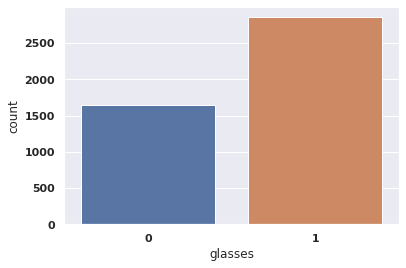

In [12]:
#Countplot
sns.set_theme(style="darkgrid")
sns.countplot(x="glasses", data=df)

###_SEPERATING **TARGET** AND **FEATURE** VARIABLES AND SPLITTING THEM FOR **TRAINING** and **TESTING**_

In [13]:
#Target and Feature Variables
y = df.iloc[:,-1].values
x = df.drop(['id','glasses'],axis=1).to_numpy()

In [14]:
#Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
#Shape
x.shape

(4500, 512)

###_VISUALIZING THE **LATENT SPACE**_

In [17]:
#Applying t-SNE
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(x)

In [18]:
#Shape
X_embedded.shape

(4500, 2)

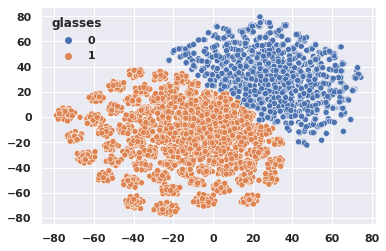

In [19]:
#Scatterplot
sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1],hue=df['glasses'])

###_**DIMENSIONALITY REDUCTION**_

_**Principal Component Analysis** (PCA)_

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_pca = st.fit_transform(x)

In [21]:
#Choosing the Minimum number of Principal Components such that 90% of the Variance is retained
from sklearn.decomposition import PCA
pca = PCA(.90)
pca.fit(x_pca)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
#Number of Components
pca.n_components_

285

In [23]:
#Shape Before
x_pca.shape

(4500, 512)

In [24]:
#Transformation
x_pca=pca.transform(x_pca)

In [25]:
#Shape After
x_pca.shape

(4500, 285)

In [26]:
#Train-Test Split for PCA Tranformed Features
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=42)

_**Linear Discriminant Analysis** (LDA)_

In [27]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_lda = st.fit_transform(x)

In [28]:
#Choosing the number of Linear Discriminants to be Two
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_lda,y)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(512, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [29]:
#Number of Components
lda.n_components

2

In [30]:
#Shape Before
x_lda.shape

(4500, 512)

In [32]:
#Transformation
x_lda = lda.transform(x_lda)

In [33]:
#Shape After
x_lda.shape

(4500, 1)

In [34]:
#Cross Validation Score
cross_val_score(lda,x,y,cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(512, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(512, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components

array([0.98666667, 0.98555556, 0.98777778, 0.98555556, 0.98555556])

In [35]:
#Train-Test Split for LDA Tranformed Features
x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(x_lda, y, test_size=0.2, random_state=42)

_**LDA** on Features obtained by **PCA**_

In [37]:
#LDA after PCA
lda_a_pca = LinearDiscriminantAnalysis(n_components=180)

In [38]:
#Fit Transformation
x_lda_a_pca = lda.fit_transform(x_pca,y)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(285, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [39]:
#Shape
x_lda_a_pca.shape

(4500, 1)

In [40]:
#Train-Test Split for LDA_after_PCA Tranformed Features
x_train_lda_a_pca, x_test_lda_a_pca, y_train_lda_a_pca, y_test_lda_a_pca = train_test_split(x_lda_a_pca, y, test_size=0.2, random_state=42)

###_VISUALIZING FOR **FEATURES OBTAINED AFTER DIMENSIONALITY REDUCTION**_

_**LDA**_

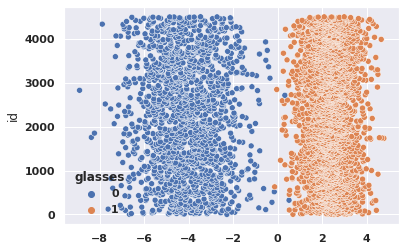

In [41]:
#Scatterplot
sns.scatterplot(x=x_lda[:,0],y=df['id'],hue=df['glasses'])

_**PCA**_

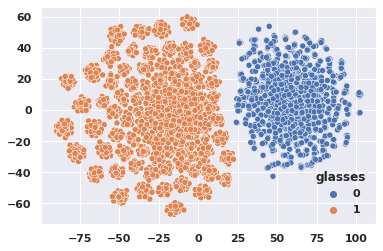

In [42]:
#Scatterplot
X_only_pca_vis = TSNE(n_components=2,init='pca').fit_transform(x_pca)
sns.scatterplot(x=X_only_pca_vis[:,0],y=X_only_pca_vis[:,1],hue=df['glasses'])

_**LDA** after **PCA**_

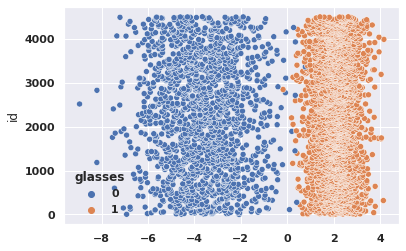

In [43]:
#Scatterplot
sns.scatterplot(x=x_lda_a_pca[:,0],y=df['id'],hue=df['glasses'])

###_**FEATURE SELECTION**_

_**SelectKBest**_

In [44]:
#SelectKBest (K=200)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi = SelectKBest(k=200)
fit_chi = chi.fit(x,y)
x_anova = fit_chi.fit_transform(x,y)

In [45]:
#Shape
x_anova.shape

(4500, 200)

In [46]:
#Train-Test Split for Selected Features
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(x_anova, y, test_size=0.2, random_state=42)

###_SELECTING **THE DESIRED MODELS**_


_1. **Decision Tree Classifier**_

In [47]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=7,min_samples_split=0.08,max_leaf_nodes=25)

In [48]:
#For data without Dimensionality Reduction
dtc.fit(x_train,y_train)
cross_val_score(dtc,x,y,cv=5)

array([0.75555556, 0.74111111, 0.75444444, 0.72555556, 0.73222222])

In [49]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
parameters = {'max_features': [ 0.2, 0.4,0.8], 'min_samples_leaf': [10,20,32,40], 'max_depth': [5,10,7],'min_samples_split':[0.1,0.2,0.08]}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, scoring='roc_auc', cv=5)
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 10, 7],
                         'max_

In [50]:
#Best Parameters and Score
print(grid_search.best_params_)
print(grid_search.best_score_)
best=grid_search.best_estimator_
cross_val_score(best,x,y,cv=5)

{'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 20, 'min_samples_split': 0.08}
0.7758689813303765


array([0.72      , 0.74555556, 0.74      , 0.71888889, 0.72888889])

In [51]:
#Using Features obtained from PCA
#PCA should be used mainly for variables which are strongly correlated. If the relationship is weak between variables, PCA does not work well to reduce data.
dtc.fit(x_train_pca,y_train_pca)
cross_val_score(dtc,x_pca,y,cv=5)

array([0.91444444, 0.94222222, 0.93      , 0.94666667, 0.91333333])

In [52]:
#Using Features obtained from LDA
dtc.fit(x_train_lda,y_train_lda)
cross_val_score(dtc,x_lda,y,cv=5)

array([0.99777778, 1.        , 1.        , 0.99888889, 1.        ])

In [53]:
#Using Features obtained from LDA which was done on Features obtained from PCA
dtc.fit(x_train_lda_a_pca,y_train_lda_a_pca)
cross_val_score(dtc,x_lda_a_pca,y,cv=5)

array([0.99888889, 0.99777778, 0.99666667, 0.99666667, 0.99777778])

In [54]:
#Using Features obtained from SelectKBest
dtc.fit(x_train_k,y_train_k)
cross_val_score(dtc,x_anova,y,cv=5)

array([0.75444444, 0.74111111, 0.74444444, 0.72333333, 0.73777778])

_2. **Multi Layer Perceptron Classifier**_

In [55]:
#Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(100,),alpha=0.0001,batch_size=250,learning_rate_init=0.001,random_state=42,warm_start=False)


In [56]:
#For data without Dimensionality Reduction
mlp.fit(x_train,y_train)
cross_val_score(mlp,x,y,cv=5)

array([0.99555556, 0.99777778, 0.99555556, 0.99      , 0.99111111])

In [57]:
#Using Features obtained from PCA
mlp.fit(x_train_pca,y_train_pca)
cross_val_score(mlp,x_pca,y,cv=5)

array([1.        , 0.99777778, 0.99777778, 0.99555556, 0.99888889])

In [58]:
#Using Features obtained from LDA
mlp.fit(x_train_lda,y_train_lda)
cross_val_score(mlp,x_lda,y,cv=5)

array([0.99777778, 1.        , 1.        , 0.99888889, 1.        ])

In [59]:
#Using Features obtained from LDA which was done on Features obtained from PCA
mlp.fit(x_train_lda_a_pca,y_train_lda_a_pca)
cross_val_score(mlp,x_lda_a_pca,y,cv=5)

array([0.99777778, 0.99888889, 0.99888889, 0.99666667, 0.99777778])

In [60]:
#Using Features obtained from SelectKBest
mlp.fit(x_train_k,y_train_k)
cross_val_score(mlp,x_anova,y,cv=5)

array([0.99222222, 0.99555556, 0.99333333, 0.99111111, 0.98666667])

_3. **AdaBoost**_

In [61]:
#ADABoost
stump = DecisionTreeClassifier(criterion="gini", max_depth=2,max_leaf_nodes=10)
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(stump ,n_estimators=100)

In [62]:
#For data without dimensionality reduction
boost.fit(x_train,y_train)
cross_val_score(boost, x, y,cv=5)

array([0.96777778, 0.96333333, 0.97      , 0.97111111, 0.97666667])

In [63]:
#Using Features obtained from PCA
boost.fit(x_train_pca,y_train_pca)
cross_val_score(boost,x_pca,y,cv=5)

array([1., 1., 1., 1., 1.])

In [64]:
#Using Features obtained from LDA
boost.fit(x_train_lda,y_train_lda)
cross_val_score(boost,x_lda,y,cv=5)

array([0.99777778, 0.99888889, 1.        , 0.99555556, 1.        ])

In [65]:
#Using Features obtained from LDA which was done on Features obtained from PCA
boost.fit(x_train_lda_a_pca,y_train_lda_a_pca)
cross_val_score(boost,x_lda_a_pca,y,cv=5)

array([0.99777778, 0.99666667, 0.99777778, 0.99555556, 0.99777778])

In [66]:
#Using Features obtained from SelectKBest
boost.fit(x_train_k,y_train_k)
cross_val_score(boost,x_anova,y,cv=5)

array([0.96777778, 0.97      , 0.97333333, 0.97111111, 0.97444444])